## HOMEWORK #3

In [782]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, mean_squared_error, mutual_info_score


data = pd.read_csv('data.csv')

In [783]:
data.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [784]:
# Select only the features
selected_columns=['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type',
    'Vehicle Style',
    'highway MPG',
    'city mpg',
    'MSRP']
df=data[selected_columns]
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Vehicle Style,Coupe,Convertible,Coupe,Coupe,Convertible
highway MPG,26,28,28,28,28
city mpg,19,19,20,18,18
MSRP,46135,40650,36350,29450,34500


In [785]:
# transforming  their names
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [786]:
df.head().T

,0,1,2,3,4
make,BMW,BMW,BMW,BMW,BMW
model,1 Series M,1 Series,1 Series,1 Series,1 Series
year,2011,2011,2011,2011,2011
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
vehicle_style,Coupe,Convertible,Coupe,Coupe,Convertible
highway_mpg,26,28,28,28,28
city_mpg,19,19,20,18,18
msrp,46135,40650,36350,29450,34500


In [787]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [788]:
# Fill missing values with 0 for all selected columns
df = df.fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [789]:
# Rename the MSRP variable to price
df.rename(columns = {'msrp':'price'}, inplace = True)
df.T

,0,1,2,3,4,5,6,7,8,9,...,11904,11905,11906,11907,11908,11909,11910,11911,11912,11913
make,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,...,BMW,BMW,Acura,Acura,Acura,Acura,Acura,Acura,Acura,Lincoln
model,1 Series M,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,...,Z8,Z8,ZDX,ZDX,ZDX,ZDX,ZDX,ZDX,ZDX,Zephyr
year,2011,2011,2011,2011,2011,2012,2012,2012,2012,2013,...,2002,2003,2011,2011,2011,2012,2012,2012,2013,2006
engine_hp,335.0,300.0,300.0,230.0,230.0,230.0,300.0,300.0,230.0,230.0,...,394.0,394.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,221.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,8.0,8.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
transmission_type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,...,MANUAL,MANUAL,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC
vehicle_style,Coupe,Convertible,Coupe,Coupe,Convertible,Coupe,Convertible,Coupe,Convertible,Convertible,...,Convertible,Convertible,4dr Hatchback,4dr Hatchback,4dr Hatchback,4dr Hatchback,4dr Hatchback,4dr Hatchback,4dr Hatchback,Sedan
highway_mpg,26,28,28,28,28,28,26,28,28,27,...,19,19,23,23,23,23,23,23,23,26
city_mpg,19,19,20,18,18,18,17,20,18,18,...,12,12,16,16,16,16,16,16,16,17
price,46135,40650,36350,29450,34500,31200,44100,39300,36900,37200,...,130000,131500,46020,56570,50520,46120,56670,50620,50920,28995


In [790]:
df.groupby(['transmission_type']).size()

transmission_type
AUTOMATED_MANUAL     626
AUTOMATIC           8266
DIRECT_DRIVE          68
MANUAL              2935
UNKNOWN               19
dtype: int64

In [791]:
mode_transmission = df['transmission_type'].mode().values[0]
print("The most frequent transmission type is:", mode_transmission)

The most frequent transmission type is: AUTOMATIC


In [792]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [793]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

numerical_data=df[numerical]


In [794]:
numerical_data.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000
mean,2010.384338,247.941749,5.614655,26.637485,19.733255
std,7.579740,110.507669,1.800554,8.863001,8.987798
min,1990.000000,0.000000,0.000000,12.000000,7.000000
25%,2007.000000,170.000000,4.000000,22.000000,16.000000
50%,2015.000000,225.000000,6.000000,26.000000,18.000000
75%,2016.000000,300.000000,6.000000,30.000000,22.000000
max,2017.000000,1001.000000,16.000000,354.000000,137.000000


In [795]:
categorical_data=df[categorical]
categorical_data.describe()

,make,model,transmission_type,vehicle_style
count,11914,11914,11914,11914
unique,48,915,5,16
top,Chevrolet,Silverado 1500,AUTOMATIC,Sedan
freq,1123,156,8266,3048


Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

In [796]:
# Create the correlation matrix
correlation = numerical_data.corr()
print(correlation)

                      year  engine_hp  engine_cylinders  highway_mpg  city_mpg
year              1.000000   0.338714         -0.040708     0.258240  0.198171
engine_hp         0.338714   1.000000          0.774851    -0.415707 -0.424918
engine_cylinders -0.040708   0.774851          1.000000    -0.614541 -0.587306
highway_mpg       0.258240  -0.415707         -0.614541     1.000000  0.886829
city_mpg          0.198171  -0.424918         -0.587306     0.886829  1.000000


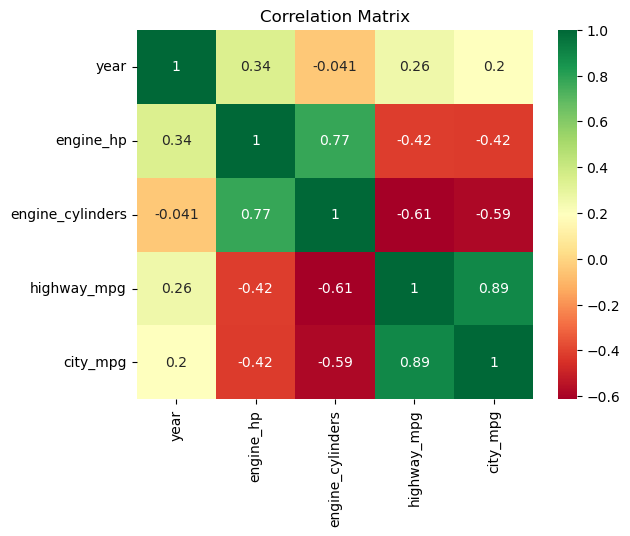

In [797]:
# Create a correlation matrix
correlation_matrix = np.array([[1.000000, 0.338714, -0.040708, 0.258240, 0.198171],
                              [0.338714, 1.000000, 0.774851, -0.415707, -0.424918],
                              [-0.040708, 0.774851, 1.000000, -0.614541, -0.587306],
                              [0.258240, -0.415707, -0.614541, 1.000000, 0.886829],
                              [0.198171, -0.424918, -0.587306, 0.886829, 1.000000]])

# Create a DataFrame from the correlation matrix
correlation_matrix_df = pd.DataFrame(correlation_matrix, columns=['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg'], index=['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg'])

# Create a heatmap of the correlation matrix
sn.heatmap(correlation_matrix_df, annot=True, cmap='RdYlGn',
            xticklabels=correlation_matrix_df.columns,
            yticklabels=correlation_matrix_df.index)

# Set the title of the heatmap
plt.title('Correlation Matrix')

# Show the heatmap
plt.show()

The two features that have the biggest correlation in this dataset 

highway_mpg and city_mpg

In [798]:
mean = df.price.mean()
mean

40594.737032063116

In [799]:
df['above_average'] = (df.price > mean).astype(int)
df.head().T

,0,1,2,3,4
make,BMW,BMW,BMW,BMW,BMW
model,1 Series M,1 Series,1 Series,1 Series,1 Series
year,2011,2011,2011,2011,2011
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
vehicle_style,Coupe,Convertible,Coupe,Coupe,Convertible
highway_mpg,26,28,28,28,28
city_mpg,19,19,20,18,18
price,46135,40650,36350,29450,34500


In [800]:
grouped_data = df.groupby('above_average').size()
grouped_data

# the value 0 appears 8,645 times in the 'above_average' column.

above_average
0    8645
1    3269
dtype: int64

In [801]:
# Split the data into train and test sets
data_train_full, data_test = train_test_split(df, test_size=0.2, random_state=42)

# Remove the target variable from the train and validation sets
data_train = data_train_full.drop('price', axis=1)
data_val = data_train_full.drop('price', axis=1)

# Split the train set into train and validation sets
data_train, data_val = train_test_split(data_train, test_size=0.25, random_state=42)

len(data_train), len(data_val), len(data_test)

(7148, 2383, 2383)

In [802]:
data_train = data_train.reset_index(drop=True)
dt_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [803]:
def mi_score(categories):
    return mutual_info_score(categories, data_train.above_average)

mi = data_train[categorical].apply(mi_score)
mi = mi.sort_values()
mi.round(2)

transmission_type    0.02
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

The variable that has the lowest mutual information score?

transmission_type

In [804]:
data_train.T

,0,1,2,3,4,5,6,7,8,9,...,7138,7139,7140,7141,7142,7143,7144,7145,7146,7147
make,Mitsubishi,Kia,Lamborghini,Chevrolet,Pontiac,Mitsubishi,BMW,Cadillac,Chevrolet,GMC,...,Mercedes-Benz,Chevrolet,Toyota,GMC,Nissan,Toyota,Chevrolet,Hyundai,Mitsubishi,Ford
model,Endeavor,Borrego,Gallardo,Colorado,Vibe,Galant,5 Series,Escalade,Colorado,Sierra 1500 Classic,...,GLA-Class,TrailBlazer,Prius,Yukon Hybrid,Truck,Sienna,HHR,Veracruz,Expo,Taurus
year,2011,2009,2012,2016,2009,2011,2016,2016,2016,2007,...,2015,2007,2015,2013,1995,2016,2009,2012,1993,2015
engine_hp,225.0,276.0,570.0,200.0,158.0,160.0,240.0,420.0,305.0,295.0,...,355.0,395.0,134.0,332.0,153.0,266.0,260.0,260.0,136.0,365.0
engine_cylinders,6.0,6.0,10.0,4.0,4.0,4.0,4.0,8.0,6.0,8.0,...,4.0,8.0,4.0,8.0,6.0,6.0,4.0,6.0,4.0,6.0
transmission_type,AUTOMATIC,AUTOMATIC,MANUAL,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,...,AUTOMATED_MANUAL,AUTOMATIC,AUTOMATIC,AUTOMATIC,MANUAL,AUTOMATIC,MANUAL,AUTOMATIC,MANUAL,AUTOMATIC
vehicle_style,4dr SUV,4dr SUV,Convertible,Crew Cab Pickup,4dr Hatchback,Sedan,Sedan,4dr SUV,Crew Cab Pickup,Extended Cab Pickup,...,4dr SUV,4dr SUV,4dr Hatchback,4dr SUV,Extended Cab Pickup,Passenger Minivan,Wagon,4dr SUV,2dr Hatchback,Sedan
highway_mpg,19,21,20,27,26,30,34,21,24,17,...,29,17,48,23,17,25,29,22,26,25
city_mpg,15,17,12,20,20,21,23,15,17,13,...,23,13,51,20,14,18,21,17,19,17
above_average,0,0,1,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [805]:
dv = DictVectorizer(sparse=False)

train_dict = data_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
y_train = data_train['above_average']
X_train

array([[1.500e+01, 6.000e+00, 2.250e+02, ..., 0.000e+00, 0.000e+00,
        2.011e+03],
       [1.700e+01, 6.000e+00, 2.760e+02, ..., 0.000e+00, 0.000e+00,
        2.009e+03],
       [1.200e+01, 1.000e+01, 5.700e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       ...,
       [1.700e+01, 6.000e+00, 2.600e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       [1.900e+01, 4.000e+00, 1.360e+02, ..., 0.000e+00, 0.000e+00,
        1.993e+03],
       [1.700e+01, 6.000e+00, 3.650e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

In [806]:
y_train

0       0
1       0
2       1
3       0
4       0
       ..
7143    0
7144    0
7145    0
7146    0
7147    0
Name: above_average, Length: 7148, dtype: int64

In [807]:
# Create and fit the logistic regression model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [808]:
val_dict = data_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_val = data_val['above_average']

X_val

array([[2.300e+01, 4.000e+00, 2.100e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [1.700e+01, 6.000e+00, 3.540e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [2.200e+01, 4.000e+00, 1.400e+02, ..., 1.000e+00, 0.000e+00,
        2.005e+03],
       ...,
       [1.200e+01, 6.000e+00, 1.900e+02, ..., 0.000e+00, 0.000e+00,
        2.003e+03],
       [1.400e+01, 8.000e+00, 4.300e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [1.800e+01, 6.000e+00, 3.210e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

In [809]:
y_val

1918     0
9951     1
5486     0
292      0
3644     0
        ..
4385     0
7339     0
9806     0
11162    1
3256     1
Name: above_average, Length: 2383, dtype: int64

In [810]:
# Predict on the validation set
y_pred = model.predict(X_val)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [811]:
# Calculate accuracy on the validation set and round it to 2 decimal digits
accuracy = round(accuracy_score(y_val, y_pred), 2)
print(f'Accuracy on the validation dataset: {accuracy}')

Accuracy on the validation dataset: 0.95


Question 5

    Let's find the least useful feature using the feature elimination technique.
    Train a model with all these features (using the same parameters as in Q4).
    Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
    For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

In [812]:
all_features = numerical + categorical

In [813]:
all_features = numerical + categorical
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(data_train[all_features].to_dict(orient='records'))

feature_scores = {}
feature_differences = {}

for feature in all_features[:]:
    sub = all_features.copy()
    sub.remove(feature)

    train_dict = data_train[sub].to_dict(orient='records')
    X_train_without_feature = dv.transform(train_dict)

    val_dict = data_val[sub].to_dict(orient='records')
    X_val_without_feature = dv.transform(val_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train_without_feature, y_train)

    y_pred = model.predict(X_val_without_feature)
    feature_score = accuracy_score(y_val, y_pred)
    feature_differences[feature] = accuracy - feature_score
    feature_scores[feature] = feature_score

# Find the feature with the smallest difference
least_useful_feature = min(feature_differences, key=feature_differences.get)

# Print the least useful feature and its score
print('The least useful feature is:', least_useful_feature)
print('The feature score is:', feature_scores[least_useful_feature])

feature_differences

The least useful feature is: year
The feature score is: 0.9475451112043642


{'year': 0.0024548887956357124,
 'engine_hp': 0.025954678976080503,
 'engine_cylinders': 0.004133445237096023,
 'highway_mpg': 0.007910197230381777,
 'city_mpg': 0.0037138061267310007,
 'make': 0.016722618548048684,
 'model': 0.029731430969366257,
 'transmission_type': 0.01000839278220722,
 'vehicle_style': 0.010847671002937376}

Question 6

    For this question, we'll see how to use a linear regression model from Scikit-Learn.
    We'll need to use the original column price. Apply the logarithmic transformation to this column.
    Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
    This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
    Round your RMSE scores to 3 decimal digits.


In [814]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,11904,11905,11906,11907,11908,11909,11910,11911,11912,11913
make,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,...,BMW,BMW,Acura,Acura,Acura,Acura,Acura,Acura,Acura,Lincoln
model,1 Series M,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,...,Z8,Z8,ZDX,ZDX,ZDX,ZDX,ZDX,ZDX,ZDX,Zephyr
year,2011,2011,2011,2011,2011,2012,2012,2012,2012,2013,...,2002,2003,2011,2011,2011,2012,2012,2012,2013,2006
engine_hp,335.0,300.0,300.0,230.0,230.0,230.0,300.0,300.0,230.0,230.0,...,394.0,394.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,221.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,8.0,8.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
transmission_type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,...,MANUAL,MANUAL,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC
vehicle_style,Coupe,Convertible,Coupe,Coupe,Convertible,Coupe,Convertible,Coupe,Convertible,Convertible,...,Convertible,Convertible,4dr Hatchback,4dr Hatchback,4dr Hatchback,4dr Hatchback,4dr Hatchback,4dr Hatchback,4dr Hatchback,Sedan
highway_mpg,26,28,28,28,28,28,26,28,28,27,...,19,19,23,23,23,23,23,23,23,26
city_mpg,19,19,20,18,18,18,17,20,18,18,...,12,12,16,16,16,16,16,16,16,17
price,46135,40650,36350,29450,34500,31200,44100,39300,36900,37200,...,130000,131500,46020,56570,50520,46120,56670,50620,50920,28995


In [828]:
# Apply the logarithmic transformation to the price column
df['log_price'] = np.log1p(df['price'])
df['log_price']

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: log_price, Length: 11914, dtype: float64

In [829]:
data.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [830]:
selected_columns=['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type',
    'Vehicle Style',
    'highway MPG',
    'city mpg',
    'MSRP']
df=data[selected_columns]
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Convert the categorical columns to lowercase and remove spaces
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

# Fill in missing values with 0
df = df.fillna(0)

# Rename the MSRP column to price
df.rename(columns={'msrp': 'price'}, inplace=True)

# Split the data into training and testing sets
data_train_full, data_test = train_test_split(df, test_size=0.2, random_state=42)
data_train, data_val = train_test_split(data_train_full, test_size=0.25, random_state=42)

# Convert the target variable to the logarithmic scale
y_train = np.log1p(data_train.price.values)
y_test = np.log1p(data_test.price.values)
y_val = np.log1p(data_val.price.values)

# Remove the target variable from the feature matrices
del data_train['price']
del data_test['price']
del data_val['price']

In [835]:
alphas = [0, 0.01, 0.1, 1, 10]

dv = DictVectorizer()

train_dict = data_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = data_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

for a in alphas:
    model = Ridge(alpha = a, solver='sag', random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    accuracy = np.sqrt(mean_squared_error(y_val, y_pred))
    accuracy_round = np.round(accuracy,4)
    print (a, accuracy_round)

0 0.2549
0.01 0.2549
0.1 0.2513
1 0.2583
10 0.336
